<a href="https://colab.research.google.com/github/FrankGangWang/AppliedML_Python_Coursera/blob/master/Exeter_Test_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def func_sum_counts(ct):
  sum = 0
  for key in ct.keys():
    sum += ct.get(key)
  return sum

def func_count_chars(line, counter):
  """func to count number of strings in string 'line' based on current 'counter'.
  Note: set counter = {} for the first line;
  """
  for c in line:
    counter[c] = counter.get(c, 0) + 1
  return counter

f = open("test.txt", "r")
ct = {}

count_chars = 0
for number_of_lines, line in enumerate(f):
  if number_of_lines<5:
    print(f'***num of chars in line {c} is {len(line), {line[-5:]}}')
  line = line.rstrip('\n')
  count_chars += len(line)
  ct = func_count_chars(line, ct)

  if number_of_lines==1:
    print(line[100:110])

  if number_of_lines<5:
    print(f'num of chars in line {number_of_lines} is {len(line), {line[-5:]}}')
    print('  accumulated num of chars=', count_chars)
    print('  count per string=', ct)

f.close()
number_of_lines = number_of_lines + 1

***num of chars in line E is (106, {'DEGE\n'})
num of chars in line 0 is (105, {'GDEGE'})
  accumulated num of chars= 105
  count per string= {'E': 32, 'D': 10, 'G': 31, 'C': 17, 'F': 15}
***num of chars in line E is (114, {'CEGE\n'})
GGGDEGECGC
num of chars in line 1 is (113, {'GCEGE'})
  accumulated num of chars= 218
  count per string= {'E': 69, 'D': 20, 'G': 64, 'C': 35, 'F': 30}
***num of chars in line E is (114, {'CEGC\n'})
num of chars in line 2 is (113, {'GCEGC'})
  accumulated num of chars= 331
  count per string= {'E': 107, 'D': 30, 'G': 97, 'C': 52, 'F': 45}
***num of chars in line E is (113, {'CGCE\n'})
num of chars in line 3 is (112, {'ECGCE'})
  accumulated num of chars= 443
  count per string= {'E': 145, 'D': 40, 'G': 129, 'C': 69, 'F': 60}
***num of chars in line E is (116, {'EGEE\n'})
num of chars in line 4 is (115, {'CEGEE'})
  accumulated num of chars= 558
  count per string= {'E': 184, 'D': 50, 'G': 162, 'C': 86, 'F': 76}


In [ ]:
print('number of lines=', number_of_lines)
print('number of chars \t=', count_chars)
print('sum counts per char\t=', func_sum_counts(ct))
print('counts per char=', ct)

number of lines= 300
number of chars 	= 32363
sum counts per char	= 32363
counts per char= {'E': 10615, 'D': 2854, 'G': 9351, 'C': 5081, 'F': 4462}


In [ ]:
chars = sorted(ct.keys())
df = np.zeros((number_of_lines, len(chars)))
df[0]

array([0., 0., 0., 0., 0.])

In [ ]:
def func_count_chars_ordered(line, chars):
  """func to count number of strings in string 'line' based on current 'counter'.
  Note: set counter = {} for the first line;
  """
  counter = np.zeros((len(chars, )))
  #print(counter, line, chars)
  for id, c in enumerate(chars):
    #print(f'id={id}, ch={chars[id]}')
    counter[id] = line.count(chars[id])
  return counter

func_count_chars_ordered('CCDCDEFGA', chars)

array([3., 2., 1., 1., 1.])

In [ ]:
func_count_chars_ordered(line, chars)


array([17., 10., 38., 15., 34.])

In [ ]:
import numpy as np
import pandas as pd

chars = sorted(ct.keys())
df = np.zeros((number_of_lines, len(chars)))
print(chars, df.shape)

f = open("test.txt", "r")
for c, line in enumerate(f):
  if c<5:
    print(f'***num of chars in line {c} is {len(line), {line[-5:]}}')
  line = line.rstrip('\n')
  df[c] = func_count_chars_ordered(line, chars)
f.close()

df = pd.DataFrame(df, columns=chars)


['C', 'D', 'E', 'F', 'G'] (300, 5)
***num of chars in line 0 is (106, {'DEGE\n'})
***num of chars in line 1 is (114, {'CEGE\n'})
***num of chars in line 2 is (114, {'CEGC\n'})
***num of chars in line 3 is (113, {'CGCE\n'})
***num of chars in line 4 is (116, {'EGEE\n'})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C       300 non-null    float64
 1   D       300 non-null    float64
 2   E       300 non-null    float64
 3   F       300 non-null    float64
 4   G       300 non-null    float64
dtypes: float64(5)
memory usage: 11.8 KB


In [ ]:
df['C']

0      17.0
1      18.0
2      17.0
3      17.0
4      17.0
       ... 
295    15.0
296    17.0
297    17.0
298    18.0
299    17.0
Name: C, Length: 300, dtype: float64

In [ ]:
from numpy import mean
from numpy import std

# calculate summary statistics
data_mean, data_std = mean(df), std(df)
# identify outliers
cut_off = data_std * 2
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
for ch in chars:
  outliers = [x for x in df[ch] if x < lower[ch] or x > upper[ch]]
  outliers_idx = df.index[df[ch]==outliers[0]].tolist()

  print(ch, outliers, '\n', outliers_idx)

C [14.0, 14.0, 14.0, 14.0, 14.0, 14.0] 
 [50, 77, 161, 170, 265, 269]
D [8.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 6.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0] 
 [24, 63, 100, 104, 122, 133, 151, 154, 159, 161, 164, 169, 187, 202, 228, 252]
E [40.0, 31.0, 40.0, 30.0, 40.0, 40.0, 30.0, 40.0, 40.0, 40.0] 
 [11, 25, 135, 141, 166, 283, 287]
F [13.0, 13.0, 13.0, 11.0, 13.0, 12.0, 13.0, 13.0, 13.0, 13.0, 12.0, 13.0] 
 [13, 54, 56, 147, 152, 154, 155, 163, 176]
G [27.0, 26.0, 25.0, 27.0] 
 [94, 269]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
#df['C']==14.0
df.index[df['C']==14.0].tolist()


[50, 77, 161, 170, 265, 269]

In [ ]:
data_mean, data_std

In [ ]:
lower, upper

In [ ]:
df['C']

In [ ]:
df.describe()

,C,D,E,F,G
count,300.000000,300.000000,300.000000,300.000000,300.00000
mean,16.936667,9.513333,35.383333,14.873333,31.17000
std,1.062899,0.661777,2.068167,0.725057,1.59465
min,14.000000,6.000000,30.000000,11.000000,25.00000
25%,16.000000,9.000000,34.000000,15.000000,30.00000
50%,17.000000,10.000000,35.000000,15.000000,31.00000
75%,18.000000,10.000000,37.000000,15.000000,32.00000
max,18.000000,10.000000,40.000000,16.000000,34.00000


In [ ]:
import plotly.express as px
#create a histogram

fig = px.histogram(df, x='C')

fig.show()

In [ ]:
#create a box plot

fig = px.box(df, y='C')

fig.show()

In [ ]:
chars

['C', 'D', 'E', 'F', 'G']

In [ ]:
fig = px.scatter(x=df['C'], y=df['D'])

fig.show()

In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
X = [[-1.1], [0.2], [101.1], [0.3]]
clf = LocalOutlierFactor(n_neighbors=2)
print(clf.fit_predict(X))

print(clf.negative_outlier_factor_)


[ 1  1 -1  1]
[ -0.98214286  -1.03703704 -73.36970899  -0.98214286]


In [ ]:
n_neighbors = 50
clf = LocalOutlierFactor(n_neighbors=n_neighbors)
results = clf.fit_predict(df)
print(np.where(results==-1))

(array([ 45, 137, 140, 143, 146, 148, 155, 164, 262, 288]),)


In [ ]:
n_neighbors = 100
clf = LocalOutlierFactor(n_neighbors=n_neighbors)
results = clf.fit_predict(df)
print(np.where(results==-1))

(array([140, 262]),)


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
#Note that neighbors.LocalOutlierFactor does not support predict, decision_function
#and score_samples methods by default but only a fit_predict method, as this estimator
#was originally meant to be applied for outlier detection. The scores of abnormality
#of the training samples are accessible through the negative_outlier_factor_ attribute.

n_neighbors = 150
clf = LocalOutlierFactor(n_neighbors=n_neighbors)
results = clf.fit_predict(df) #
print(np.where(results==-1))
#estimator.predict(X_test): Inliers are labeled 1, while outliers are labeled -1.
#clf.negative_outlier_factor_
#The decision_function method is also defined from the scoring function, in such
#a way that negative values are outliers and non-negative ones are inliers:
#estimator.decision_function(X_test)

#negative_outlier_factor_: The opposite LOF of the training samples. The higher, the more normal.
#Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.


(array([262]),)


In [ ]:
df.iloc[np.where(results==-1)].T

In [ ]:
n_neighbors = 50
clf = LocalOutlierFactor(n_neighbors=n_neighbors)
results = clf.fit_predict(df)
print(np.where(results==-1))
print(df.iloc[np.where(results==-1)].T)


In [ ]:
df.iloc[np.where(results==-1)]

In [ ]:
df.iloc[[1,2]]

In [ ]:
df.boxplot(column=['C', 'D', 'F'])


In [ ]:
df.boxplot()


In [ ]:
df.boxplot(column=['E', 'G'])


In [ ]:
df.describe()

In [ ]:
print(clf.negative_outlier_factor_)

https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html#sphx-glr-auto-examples-neighbors-plot-lof-outlier-detection-py

Outlier detection with Local Outlier Factor (LOF)


In [1]:
import numpy as np

np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

In [8]:
X_inliers.shape, np.random.randn(100, 2).shape, X_outliers.shape, n_outliers, X.shape

((200, 2), (100, 2), (20, 2), 20, (220, 2))

In [2]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

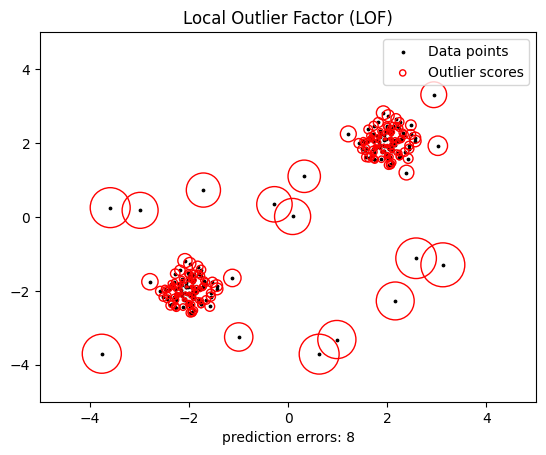

In [3]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()